In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

1. Generate an integer number of period (Np) of the sin function in the discrete domain by choosing its frequency (fs=1/T) and a sampling frequency fg : s[k] = sin(2.PI.fs.k/fg). The length of the signal is then N and must be even.

In [13]:
# Define the frequency and sampling frequency
T  = 0.01
fs = 5
fg = 100
Tg = 1/ fg

# Compute the number of samples
Np = 1
N = int((Np*fg/fs))   

if N%2 != 0:
    N += 1
print("Number of samples = ",N)

Number of samples =  20


2. Compute the DFT and display the amplitude. Scale the x-axis in frequencies. What is the frequency dictionary ?

Frequencies =  [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45. -50. -45. -40. -35.
 -30. -25. -20. -15. -10.  -5.]


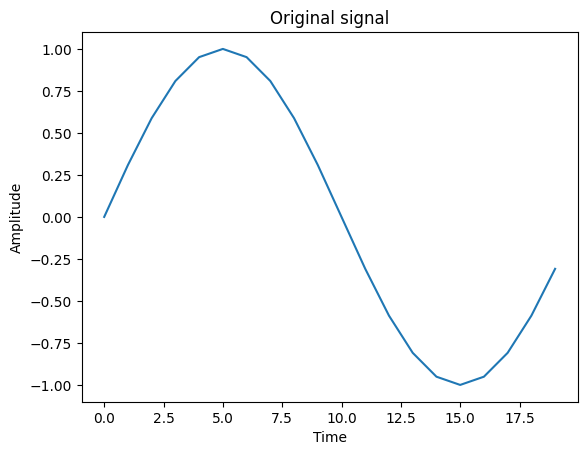

In [17]:
# Generate the sin function
k = np.arange(N)
s = np.sin(2*np.pi*fs*k/fg)

dft = np.fft.fft(s)/N
dft1=np.fft.fftshift(dft)

# Display the amplitude
amplitude = np.abs(dft)

# Scale the x-axis in frequencies
frequencies = np.fft.fftfreq(N, 1/fg)
print("Frequencies = ",frequencies)
# Plot the amplitude spectrum
plt.plot(s)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Original signal")

plt.show()

Total Harmonic Distortion: 0.000


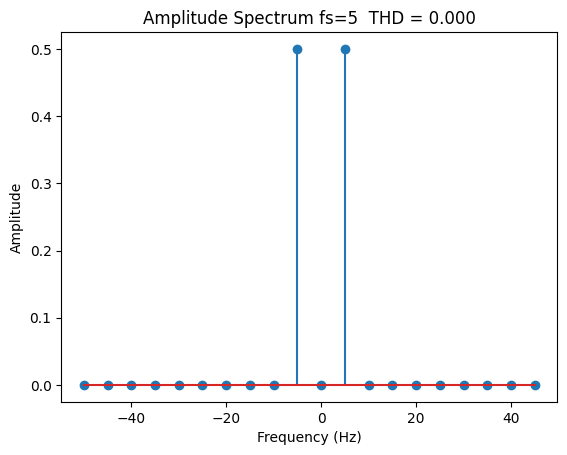

In [20]:
plt.stem(frequencies,amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title("Amplitude Spectrum")

A1 = amplitude[0]
A2 = np.sqrt(np.sum(amplitude[1:]**2))
THD = A1/A2
plt.title('Amplitude Spectrum fs=5  THD = {:.3f}'.format(THD))
print("Total Harmonic Distortion: {:.3f}".format(THD))

3. Change the signal frequency so that it does not match the dictionary. What is the result of the DFT ? Adjust the number N to obtain the best Total harmonic distortion (THD=sqrt(A2^2+ A3^2…)/A1). Discard the mean component.

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45. -50. -45. -40. -35.
 -30. -25. -20. -15. -10.  -5.]
Total Harmonic Distortion: 0.046


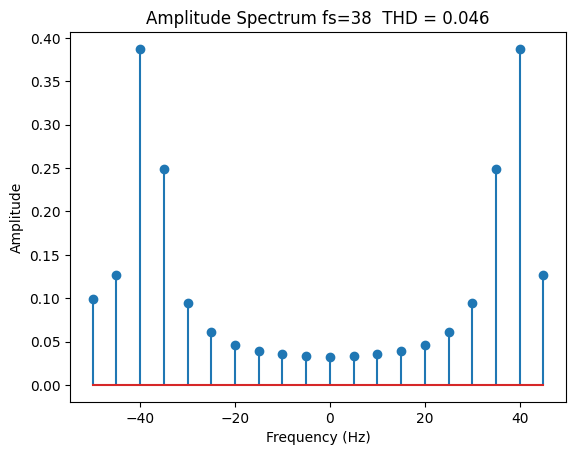

In [22]:
s1 = np.sin(2*np.pi*38*k/fg)
dft1 = np.fft.fft(s1)/N

# Display the amplitude
amplitude2 = np.abs(dft1)

# Scale the x-axis in frequencies
frequencies1 = np.fft.fftfreq(N, 1/fg)
print(frequencies1)

# Plot the amplitude spectrum
plt.stem(frequencies1,amplitude2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
#plt.xlim(0, fg/2)

A1_ = amplitude2[0]
A2_ = np.sqrt(np.sum(amplitude2[1:]**2))
THD_ = A1_/A2_
plt.title('Amplitude Spectrum fs=38  THD = {:.3f}'.format(THD_))
print("Total Harmonic Distortion: {:.3f}".format(THD_))


4.Load the file 100m.mat and display the signal (variable val). Extract few periods and analyse the DFT (amplitude).  Rk : in python use val[Ø] instead of val. Discard the mean component.

Total Harmonic Distortion : 32.787


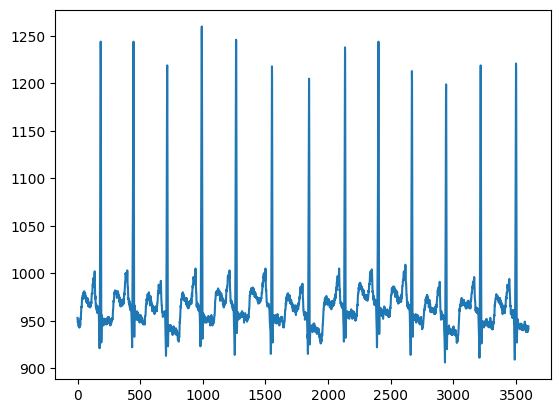

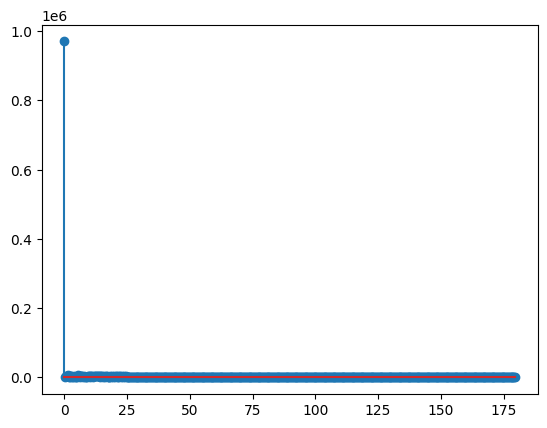

In [51]:
# Load file and analyze DFT
import scipy.io
data = scipy.io.loadmat('C:/Users/ksevi/OneDrive/Desktop/MASTER/SCENE_LALIGANT/tercer report/100m.mat')

val = data['val'][0]
plt.figure()
plt.plot(val)
N = 1000
k = np.arange(N)
s4 = val[0:N]
S4 = np.fft.fft(s4)
freq = np.fft.fftfreq(N, 1/360)
plt.figure()
plt.stem(freq[0:N//2], np.abs(S4[0:N//2]))

A1_ =np.abs(S4[0:N//2])[0]
A2_ = np.sqrt(np.sum(np.abs(S4[0:N//2])[1:]**2))
THD_ = A1_/A2_
print("Total Harmonic Distortion : {:.3f}".format(THD_))

5. Cancel the spurious frequency of the 60Hz electrical network.

Total Harmonic Distortion without 60H Fz: 0.069


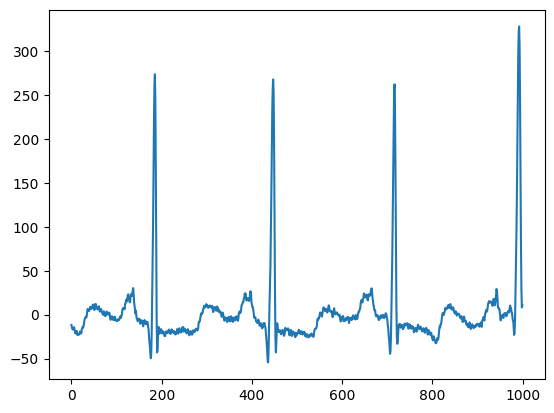

In [53]:
# Cancel 60Hz frequency
b, a = butter(4, 2*np.pi*60/360, 'high', fs=360)

s5 = filtfilt(b, a, s4)
S5 = np.fft.fft(s5)
plt.figure()
plt.plot(s5)

A1_ =np.abs(S5[0:N//2])[0]
A2_ = np.sqrt(np.sum(np.abs(S5[0:N//2])[1:]**2))
THD_ = A1_/A2_
print("Total Harmonic Distortion without 60H Fz: {:.3f}".format(THD_))

6. Consider the second order low-pass filter of Butterworth (z=0.707) : apply this filter in the Fourier space to denoise the signal. Reconstruct the denoised signal.

Total Harmonic Distortion for Denoised signal: 0.004


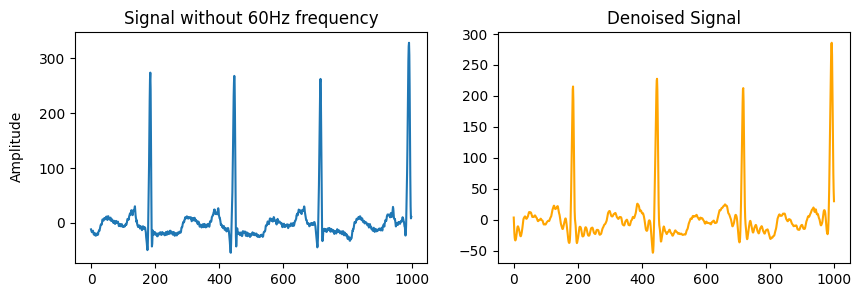

In [69]:
# Denoise signal with Butterworth filter
cutoff = 20
z = 0.707
order = int(np.ceil(2 / (1 - z)))
b, a = butter(order,  2*np.pi*cutoff/360, 'low')

S6 = S5.copy()
S6[(freq > cutoff)] = 0
s6 = np.fft.ifft(S6)
s6 = np.real(s6)
s6 = filtfilt(b, a, s6)

A1_ =np.abs(s6[0:N//2])[0]
A2_ = np.sqrt(np.sum(np.abs(s6[0:N//2])[1:]**2))
THD_ = A1_/A2_
print("Total Harmonic Distortion for Denoised signal: {:.3f}".format(THD_))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Plot original signal in first subplot
axs[0].plot(s5)
axs[0].set_title('Signal without 60Hz frequency')

# Plot denoised signal in second subplot
axs[1].plot(s6,color="orange")
axs[1].set_title('Denoised Signal')

# Set common y-label
fig.text(0.06, 0.5, 'Amplitude', va='center', rotation='vertical')

# Show the plot
plt.show()

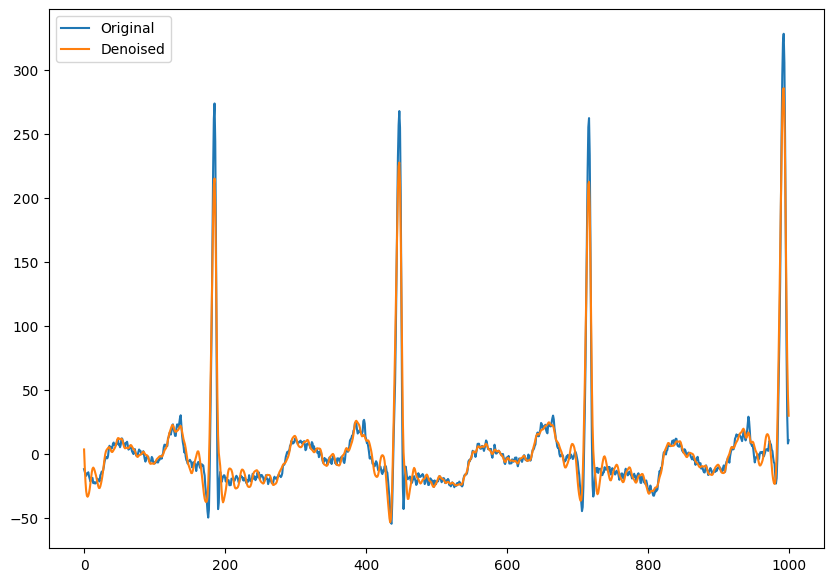

In [68]:
# Plot original and denoised signals
plt.figure(figsize=(10, 7))
plt.plot(s5)
plt.plot(s6)
plt.legend(['Original', 'Denoised'])
plt.show()